Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw 
inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [159]:
#  UPLOAD THE DATA 
import pandas as pd 
import numpy as np 
import seaborn as sns
df=pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [160]:
# RENAME THE  COLUMN NAME 
df.rename(columns={"Unnamed: 0": "USA_state"}, inplace=True)


<AxesSubplot:ylabel='Frequency'>

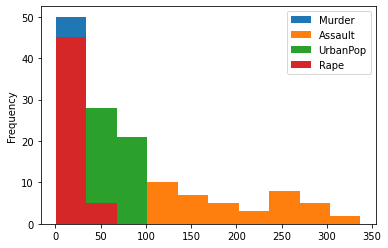

In [161]:
df.drop(['USA_state'], axis=1)

df.plot(kind='hist')

In [162]:
# SIZE OF DATA
df.shape

(50, 5)

In [163]:
# DATA HAVE ALL VALUES NO EMPTY VALUE IN DATA  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USA_state  50 non-null     object 
 1   Murder     50 non-null     float64
 2   Assault    50 non-null     int64  
 3   UrbanPop   50 non-null     int64  
 4   Rape       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

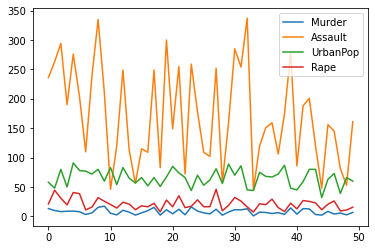

In [164]:
# DATA VISUALIZATION 
df.plot()

<AxesSubplot:>

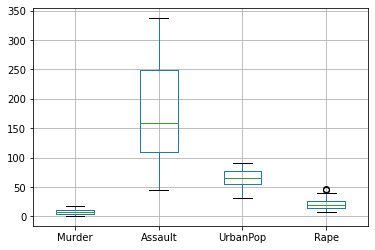

In [165]:
df.boxplot()

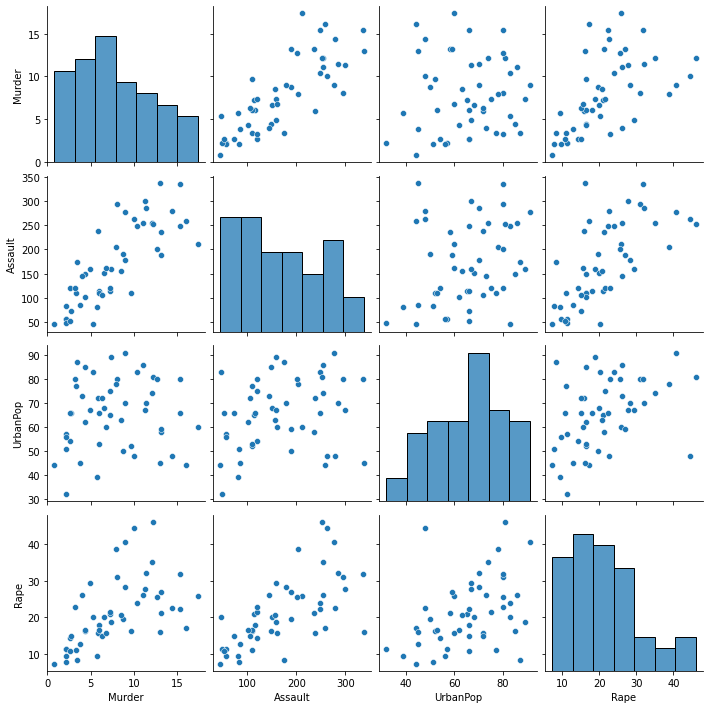

In [166]:
sns.pairplot(df)

In [167]:
#  DATA NORMALIZATION 

from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()

new_df=normalize.fit_transform(df.iloc[ :, 1:].to_numpy()) # this will do normalize last four columns and convert in numpy

newdf1=pd.DataFrame(new_df, columns= df.columns[1:]) # this convert in data frame and take column from orginal data 
newdf1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# HIERARCHY CLUSTERING

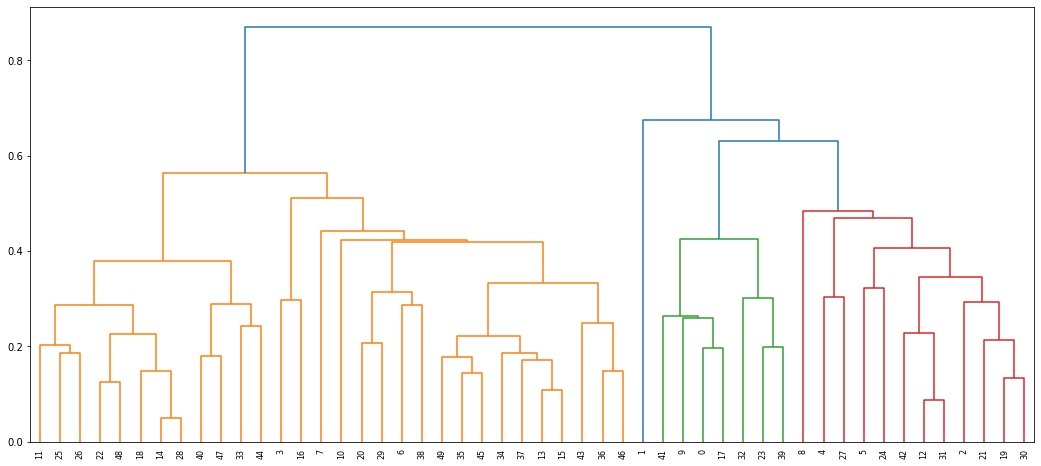

In [233]:
# DENDROGRAM

from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(18,8))
dendogram= sch.dendrogram(sch.linkage(newdf1, method='average'))


* By this dendrogram we can understand that 5 cluster for data is good decision. 

In [169]:
#  IMPORT THE LIBRARY BY CLUSTRING TECNIQUE FOR MAKING CLUSTER

model= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='average')

result=model.fit_predict(newdf1)
result

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [170]:
clusters = pd.DataFrame(result, columns=['clusters'])
clusters.head()

,clusters
0,3
1,2
2,1
3,0
4,1


In [171]:
# ADD CLUSTER IN MAIN DATA 
df['clusters_r']=clusters
df.sort_values('clusters_r')

,USA_state,Murder,Assault,UrbanPop,Rape,clusters_r
49,Wyoming,6.8,161,60,15.6,0
29,New Jersey,7.4,159,89,18.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
34,Ohio,7.3,120,75,21.4,0
13,Indiana,7.2,113,65,21.0,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0
10,Hawaii,5.3,46,83,20.2,0


By this prediction we can understand the situation of USA statewise cluster number 0 is good  state compare to 
other because these stats have population high then also in these state mureder and rape is low, While cluster number 2 is 
wrost that have single state that have low population but rape and murder have more that's why this is wrost state. 

# K-MEAMNS

In [172]:
# HERE WE WILL USE K-MEANS  CLUSTERING ALGORITHM
# UPLOAD THE DATA 

from sklearn.cluster import KMeans

df.head()
df1=pd.read_csv('crime_data.csv')
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [173]:
newdf1.head()  # data after normalization 

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [174]:
# HERE WE ARE USING K-MEANS CLUSTERING AND WE WILL DIVIDE DATA IN 4 CLUSTER , ELBOW CHART BY ALSO 4 IS GOOD 
kmeans=KMeans(n_clusters=4, random_state=0)  # here random_state is paseudo random value
kmeans.fit(newdf1)

KMeans(n_clusters=4, random_state=0)

In [175]:
kmeans.inertia_         # it is wcss(Within-Cluster Sum of Square) value 


3.6834561535859134

In [176]:
# THESE ARE CLUSTER 
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [177]:
cluster1= pd.DataFrame(kmeans.labels_, columns=['colustersK'])


In [178]:
# CLUSTERS ADD  IN THE MAIN DATA FOR UNDERSTANDING WHICH STATE IS COMING IN WHICH GROUP 
df1['cluster1']=cluster1
df1.sort_values('cluster1')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster1
21,Michigan,12.1,255,74,35.1,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
19,Maryland,11.3,300,67,27.8,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
30,New Mexico,11.4,285,70,32.1,0
8,Florida,15.4,335,80,31.9,0
42,Texas,12.7,201,80,25.5,0
27,Nevada,12.2,252,81,46.0,0


In [179]:
# it is wcss(Within-Cluster Sum of Square) value  

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(newdf1)
    wcss.append(kmeans.inertia_)

In [180]:
wcss

[13.184122550256443,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.2250722560447906,
 2.8520398885211113,
 2.5848664114310447,
 2.3142016897116364,
 2.125929265181011,
 1.8528270051870228]

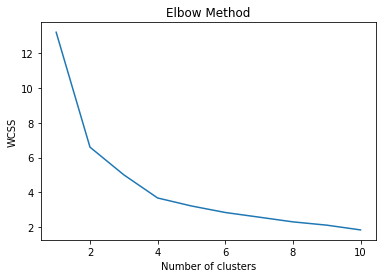

In [181]:
# ELBOW CHART 

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()                           # this is elbow graph 

# DBSCANE

In [192]:
# HERE WE WILL USE DBSCANCE CLUSTERING ALGORITHM TECNIQUE
# UPLOAD THE DATA 

import pandas as pd
import numpy as np 
df3=pd.read_csv('crime_data.csv')
df3.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [191]:
# CONVERT THE DATA IN  ARRAY
df4=df3.iloc[:,1:].to_numpy()
df4

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [193]:
#  DATA NORMALIZATION 
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()

norma1=normalize.fit_transform(df4)
norma1

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [184]:
# USE THE DBSCANE ALGORITHM 
from sklearn.cluster import DBSCAN
DBmodel=DBSCAN()
DBmodel.fit(norma1)

DBSCAN()

In [194]:
DBmodel.labels_               # DBSCAN is made only one cluster all data and it is given one noise 

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [195]:
labels= pd.DataFrame(DBmodel.labels_, columns=['clusters'])


In [196]:
df5= pd.concat([df3,labels], axis=1)
df5

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


* By above cluster we can understand that DBSCAN algorithm is  not good for this data this is unable find good result. This is given one cluster and one noise in whole data 


* Herarchy clustering tecnique is good for this data 

*****************************************************

# SECOND QUESTION

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [2]:
# UPLOAD DATA 

import pandas as pd 
import numpy as np 

df11 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df11

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df11.shape

(3999, 12)

In [5]:
df12=df11.drop(['ID#'], axis=1)

In [6]:
df12.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

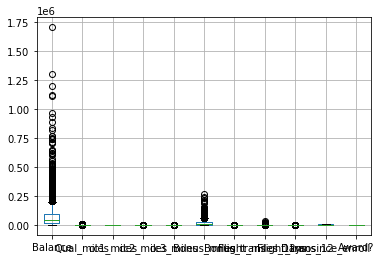

In [44]:
df12.boxplot()

<AxesSubplot:ylabel='Frequency'>

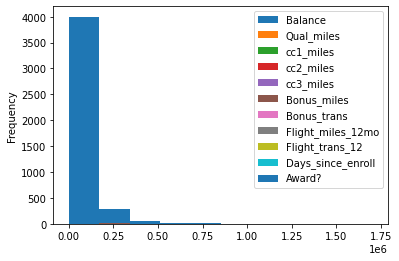

In [45]:
df12.plot(kind='hist')

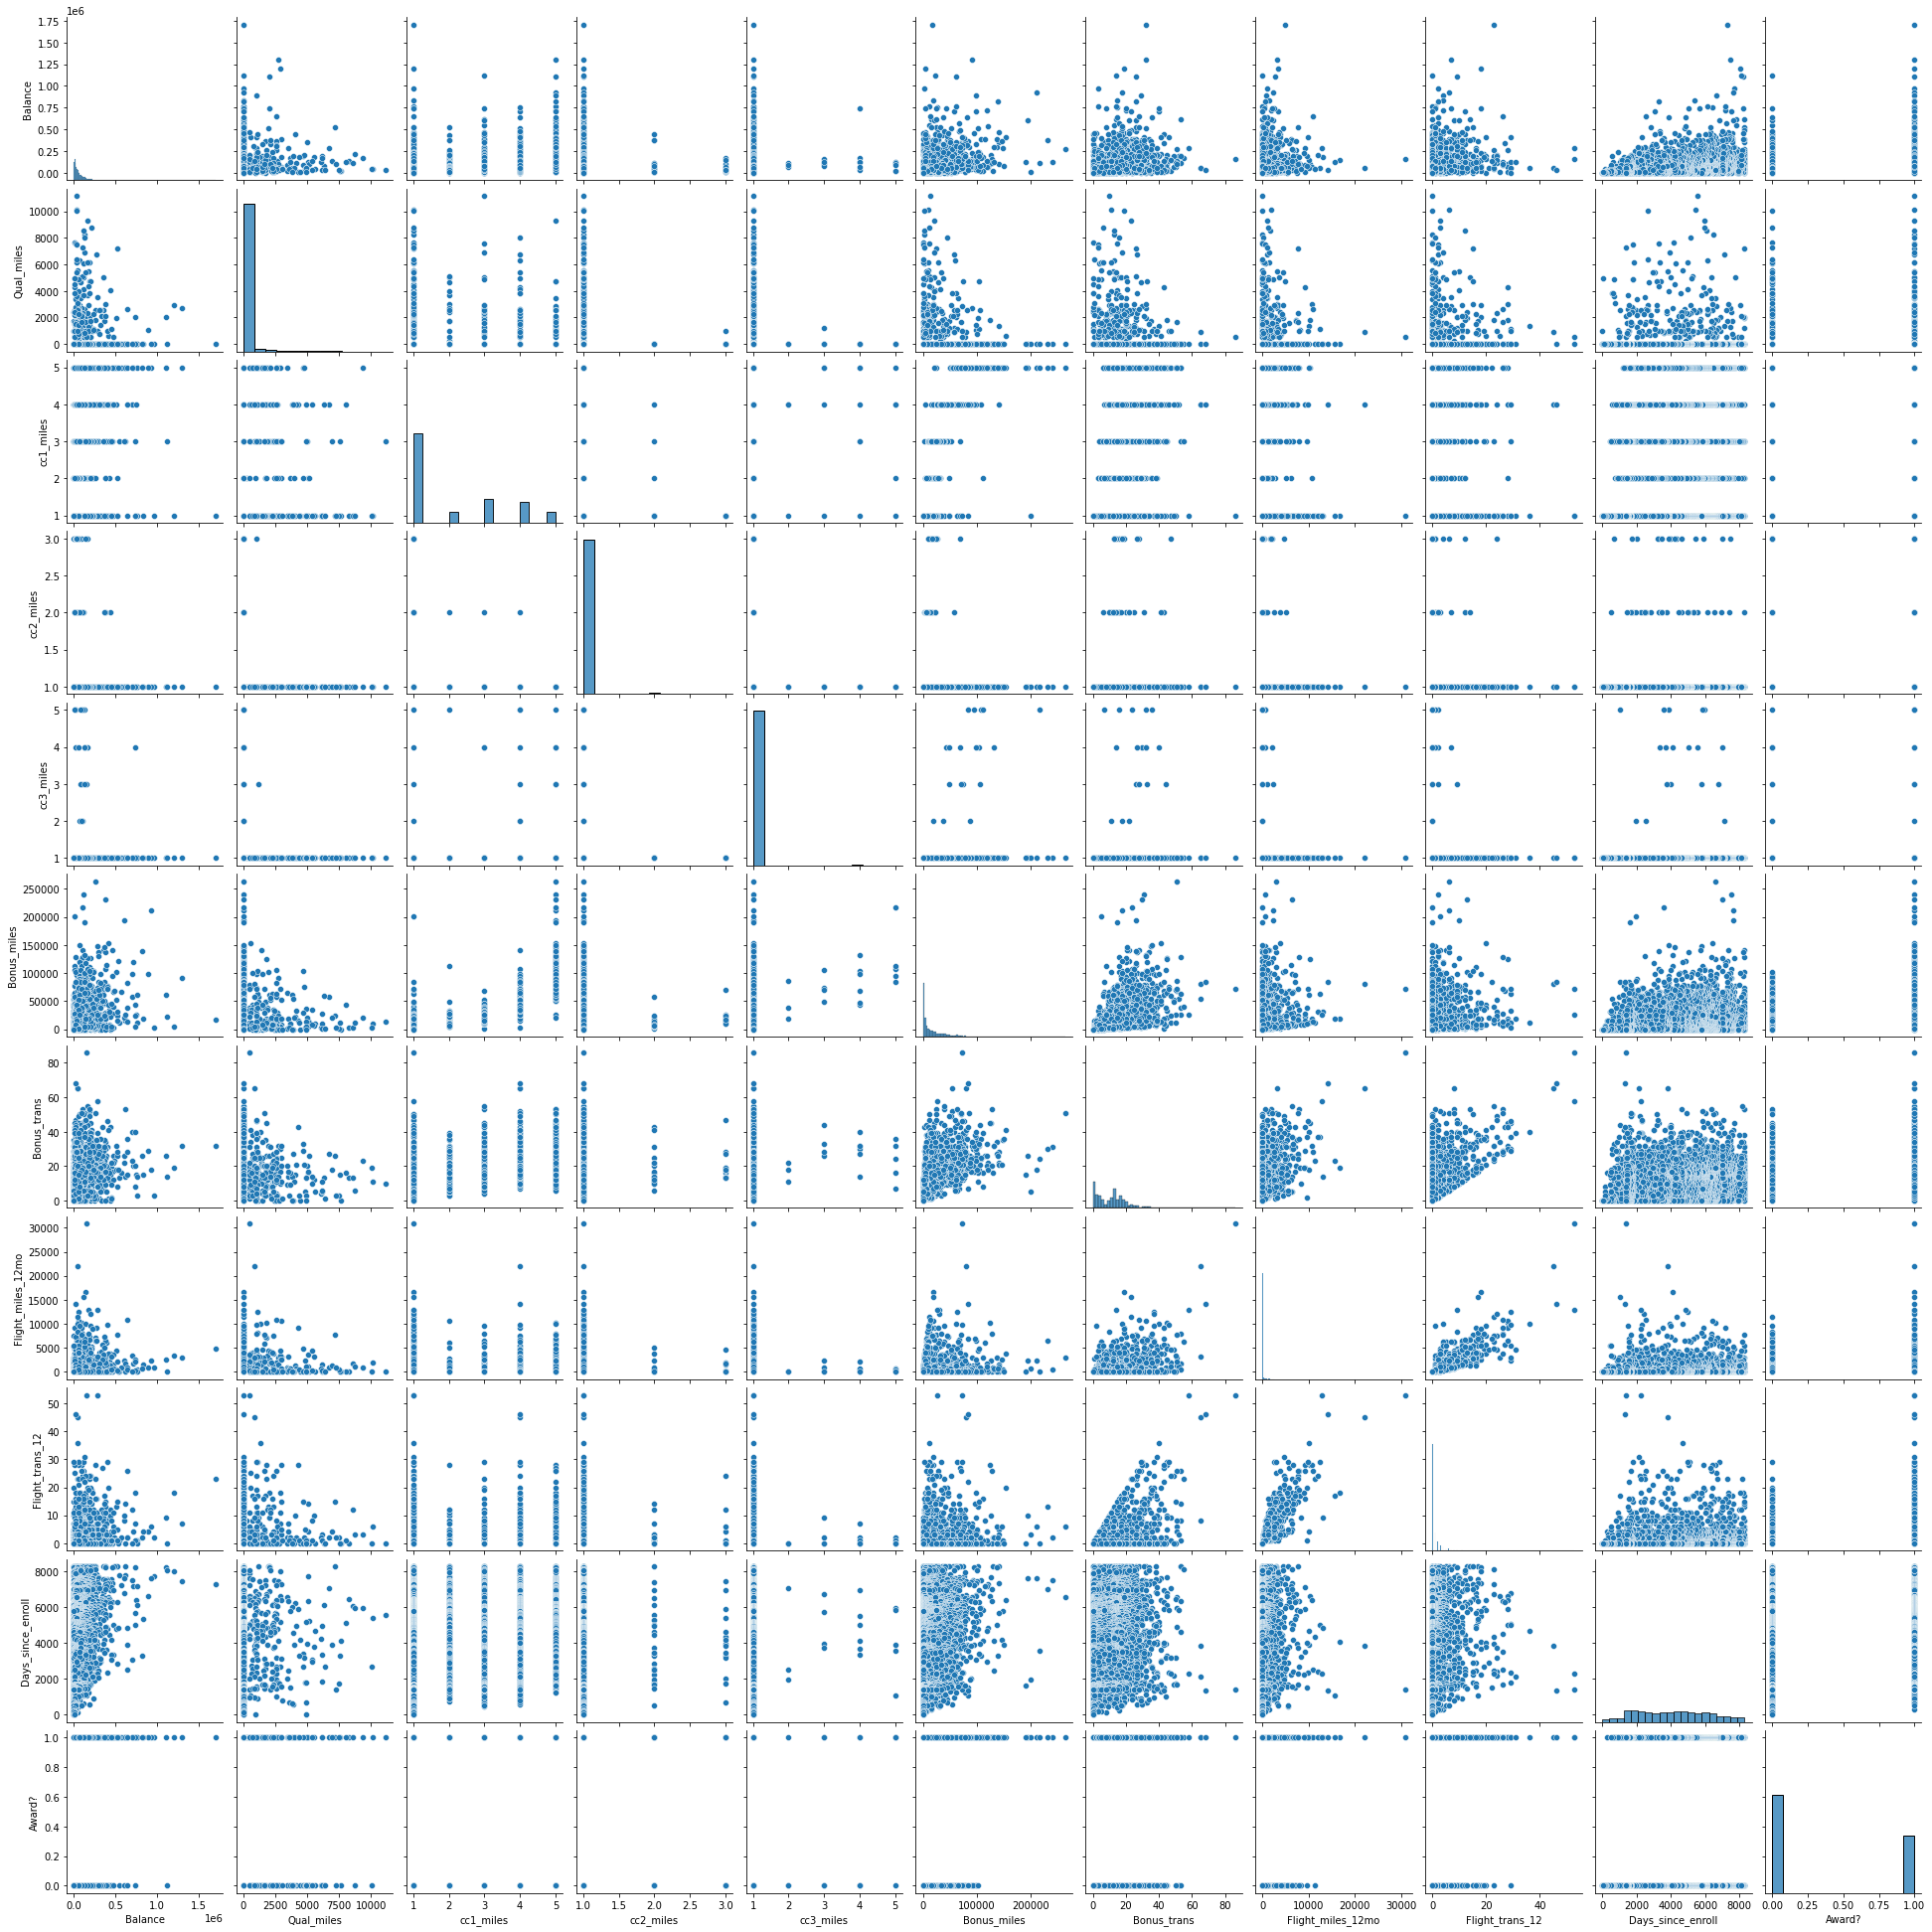

In [48]:
import seaborn as sns
sns.pairplot(df12)

In [7]:
# CONVERT THE DATA IN  ARRAY
df13=df12.to_numpy()
df13

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [8]:
#  DATA NORMALIZATION 
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()

norma22=normalize.fit_transform(df13)
norma22

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# USE THE DBSCANE ALGORITHM 


In [9]:
from sklearn.cluster import DBSCAN
DBmodel=DBSCAN()
DBmodel.fit(norma22)

DBSCAN()

In [10]:
# CLUSTERS
DBmodel.labels_             

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
# CONVERT CLUSTER ARRAY TO DATAFRAME 
labels11= pd.DataFrame(DBmodel.labels_, columns=['clusters11'])


In [12]:
# ADD TO CLUSTE IN MAIN DATA 
df14= pd.concat([df11,labels11], axis=1)
df14

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters11
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [13]:
# NUMBER OF CLUSTER AND NOISE
df14['clusters11'].value_counts()

 0    2486
 1    1451
 4      16
-1      14
 2      11
 3       9
 5       6
 6       6
Name: clusters11, dtype: int64

* its mean dbscane algorithm divided this data in 7 cluster and one noise 

**************************

# HARARCHY ALGORITHM 

In [15]:
# this is normalized data 
df15=pd.DataFrame(norma22, columns= df11.columns[1:]) # this convert in data frame and take column from orginal data 
df15.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


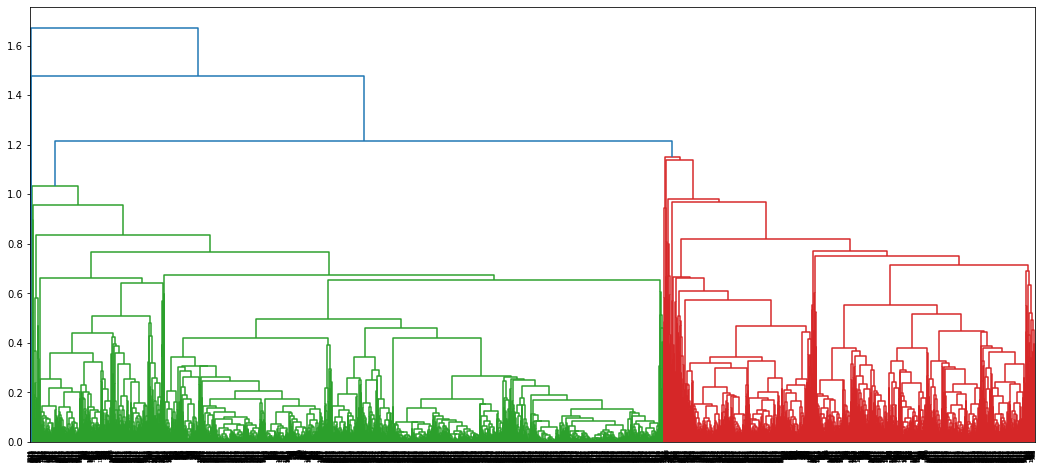

In [16]:
# DENDROGRAM 

from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(18,8))
dendogram1= sch.dendrogram(sch.linkage(df15, method='average'))

In [18]:
#  IMPORT THE LIBRARY BY CLUSTRING TECNIQUE FOR MAKING CLUSTER

model11= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='average')

result11=model11.fit_predict(df15)
result11

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [19]:
# CLUSTER MAKE DATA FRAME COLUMN
clusters12 = pd.DataFrame(result11, columns=['clusters12'])
clusters12.head()

,clusters12
0,1
1,1
2,1
3,1
4,0


In [20]:
# ADD CLUSTER IN MAIN DATA 
df11['clusters_12']=clusters12
df11.sort_values('clusters_12')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_12
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1505,1520,391222,0,3,1,1,27471,20,1600,7,4905,1,0
1503,1518,507371,0,4,1,1,51765,18,450,1,4770,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
1501,1516,54116,1846,3,1,1,34997,14,0,0,4848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4


In [21]:
# NUMBER OF CLUSTE AND NUMBER OF VALUES IN CLUSTER 
df11['clusters_12'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: clusters_12, dtype: int64

* cluste number 0 and 1 have more values

*******************************************

In [31]:
# K-MEANS ALGORIHM
# main data 
df11

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_12
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [23]:
# normalized data 
df15

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [32]:
# HERE WE ARE USING K-MEANS CLUSTERING AND WE WILL DIVIDE DATA IN 4 CLUSTER , ELBOW CHART BY ALSO 4 IS GOOD 

from sklearn.cluster import KMeans

kmeans1=KMeans(n_clusters=4, random_state=0)       # here random_state is paseudo random value
kmeans1.fit(df15)

KMeans(n_clusters=4, random_state=0)

In [27]:
kmeans1.inertia_         # it is wcss(Within-Cluster Sum of Square) value 


436.71719004195575

In [28]:
# THESE ARE CLUSTER 
kmeans1.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [30]:
cluster13= pd.DataFrame(kmeans1.labels_, columns=['colustersK1'])
cluster13

,colustersK1
0,1
1,1
2,1
3,1
4,2
...,...
3994,0
3995,0
3996,2
3997,1


In [38]:
# CLUSTERS ADD  IN THE MAIN DATA FOR UNDERSTANDING WHICH STATE IS COMING IN WHICH GROUP 
df11['cluster13']=cluster13
df11.sort_values('cluster13')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_12,cluster1,cluster13
2211,2229,24111,0,2,1,1,9374,16,0,0,3802,1,0,0,0
497,503,11070,0,1,1,1,0,0,0,0,7939,1,0,0,0
3084,3106,25485,0,1,1,1,9655,10,2800,8,2798,1,0,0,0
500,506,207545,0,1,1,1,11137,34,4387,12,8105,1,0,0,0
3508,3531,9389,0,1,1,1,4195,5,695,2,1509,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2806,39098,0,3,1,1,18992,14,0,0,2129,0,1,3,3
1723,1739,66328,0,4,1,1,40522,14,0,0,4575,0,1,3,3
1724,1740,51745,0,4,1,1,41377,14,0,0,4606,0,1,3,3
678,688,280561,0,3,1,1,12154,13,0,0,6337,0,1,3,3


In [39]:
# NUMBER OF CLUSTER AND NUMBER VALUES IN CLUSTER 
df11['cluster13'].value_counts()

1    1891
2     808
0     673
3     627
Name: cluster13, dtype: int64

In [42]:
# it is wcss(Within-Cluster Sum of Square) value  

wcss1=[]
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, random_state = 0)
    kmeans1.fit(df15)
    wcss1.append(kmeans1.inertia_)
wcss1

[1830.7932128584112,
 823.6756984125207,
 625.1684881570719,
 436.71719004195575,
 348.9433217254136,
 319.0111513821081,
 287.72955346517995,
 263.21429989139284,
 243.9257488033737,
 226.10985005073985]

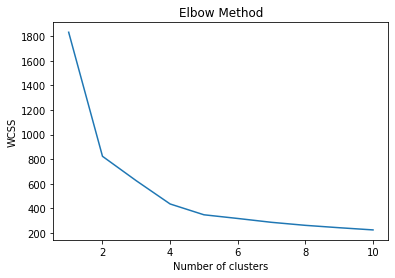

In [43]:
# ELBOW CHART 

plt.plot(range(1, 11), wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()                           # this is elbow graph 

* BY ELBOW CHART WE CAN UNDERSTAND HOW MANY CLUSTER WE SHOULD MAKE 